# Directed Search: Scenario discovery & trade-off analysis

Scenario discovery and trade-off analysis are used to detect the vulnerabilities of candidate solutions. Patient Rule Induction Method (PRIM) is used to identify policy vulnerabilities. For this analysis the results of the uncertainty analysis model simulation are applied. In this simulation, the 9 policies of interest are evaluated under 5000 scenarios.

ZEGGEN IN WELKE PARAGRAAF


In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)
from ema_workbench import MultiprocessingEvaluator, ema_logging
from ema_workbench import Samplers
from ema_workbench.em_framework import get_SALib_problem
from problem_formulation import get_model_for_problem_formulation
import matplotlib.pyplot as plt


In [2]:
from SALib.analyze.sobol import analyze

### Importing results

In [3]:
experiments = pd.read_csv('data/output_data/experiments_uncertainty_simulation_5000s.csv')
outcomes = pd.read_csv('data/output_data/outcomes_uncertainty_simulation_5000s.csv')

## 1. PRIM

Below scenario discovery has been applied again, just like 1.2.2, using PRIM. It is chosen to focus at the 10% worst outcomes for both the number of expected deaths and the expected annual damage. This means that only 10% of all scenarios with either the highest number of expected deaths or the highest expected annual damage are included.

The PRIM algorithm was used with the default value for the peeling alfa and a value of 0.8 as threshold. 0.8 was chosen after conducting a small sensitivity analysis, which showed that the use of another threshold did not lead to significantly different results


Wel nog iets toevoegen over keuze van box!!
### 1.2 Expected Number of Deaths

In [4]:
# Find uncertainty_experiments
# A list has been created of uncertainties in the model
list_of_uncertainties = ['discount rate 0','discount rate 1','discount rate 2',\
'A.0_ID flood wave shape',
'A.1_Bmax','A.1_pfail','A.1_Brate',\
'A.2_Bmax','A.2_pfail','A.2_Brate',\
'A.3_Bmax','A.3_pfail','A.3_Brate',\
'A.4_Bmax','A.4_pfail','A.4_Brate',\
'A.5_Bmax','A.5_pfail','A.5_Brate',]

#experiments onbekend is nog niet duidelijk welke dataset hier gebruikt wordt.
uncertainty_experiments = experiments.loc[:,list_of_uncertainties]
uncertainty_experiments

,discount rate 0,discount rate 1,discount rate 2,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.1_Brate,A.2_Bmax,A.2_pfail,A.2_Brate,A.3_Bmax,A.3_pfail,A.3_Brate,A.4_Bmax,A.4_pfail,A.4_Brate,A.5_Bmax,A.5_pfail,A.5_Brate
0,1.5,1.5,4.5,119,323.428446,0.377191,1.5,131.061323,0.293888,10.0,124.479343,0.306328,1.0,273.991783,0.761013,1.0,265.233231,0.685904,1.5
1,3.5,4.5,3.5,121,167.993621,0.901348,1.0,42.789516,0.288916,10.0,196.810449,0.818037,1.5,150.732121,0.998636,1.0,154.752043,0.517362,1.0
2,3.5,2.5,2.5,82,176.902307,0.485454,1.5,314.770470,0.107622,1.0,198.576705,0.673845,1.5,109.758023,0.669416,10.0,222.357229,0.275681,1.0
3,2.5,2.5,3.5,25,259.339025,0.027976,1.5,117.269882,0.785194,1.0,327.156934,0.952394,1.5,32.924106,0.810848,10.0,173.315665,0.274442,10.0
4,3.5,1.5,4.5,109,179.274614,0.655612,1.0,53.193314,0.737245,1.0,163.865646,0.905633,10.0,184.904937,0.069255,1.0,119.673285,0.695685,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,3.5,4.5,3.5,23,132.589527,0.444795,10.0,185.448554,0.965250,1.0,279.006844,0.717771,1.0,68.395770,0.062068,1.0,228.614757,0.423266,1.5
44996,1.5,1.5,2.5,47,225.003940,0.542024,1.0,243.679358,0.344594,1.5,318.874694,0.923207,10.0,291.907879,0.973366,1.0,64.264494,0.952759,1.0
44997,3.5,3.5,1.5,19,55.639644,0.074683,1.5,249.368578,0.668730,1.0,138.086117,0.516068,10.0,58.328495,0.821887,1.5,79.448726,0.272984,1.0
44998,3.5,4.5,1.5,42,101.033240,0.069266,1.0,41.679187,0.639812,10.0,335.528377,0.524703,10.0,337.150714,0.038436,1.0,342.418785,0.413884,1.5


In [5]:
# Juiste outcomes definieren

[MainProcess/INFO] 45000 points remaining, containing 33871 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.0644, coverage: 0.08555991851436331, density: 1.0 restricted_dimensions: 3


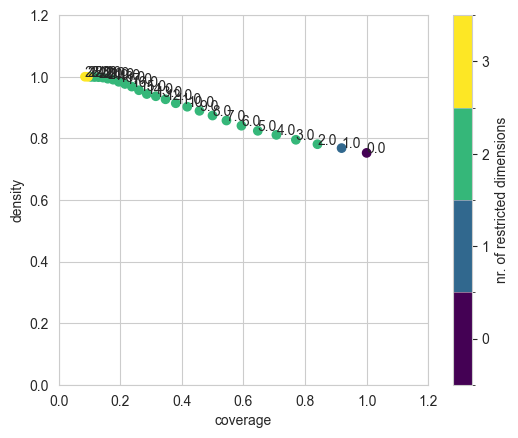

In [12]:
# applying PRIM to the worst outcomes for the expected number of deaths (highest number of deaths)
x = uncertainty_experiments
y = outcomes['Expected Number of Deaths'] > 0.001 #amount of death to be lowest as possible

prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

box1.show_tradeoff(annotated=True)
plt.show()

coverage     0.159458
density      0.993561
id          20.000000
mass         0.120800
mean         0.993561
res_dim      2.000000
Name: 20, dtype: float64

             box 20                             
                min       max qp value  qp value
A.5_pfail  0.000185  0.132982      NaN  0.000000
A.2_pfail  0.000048  0.900035      NaN  0.290112



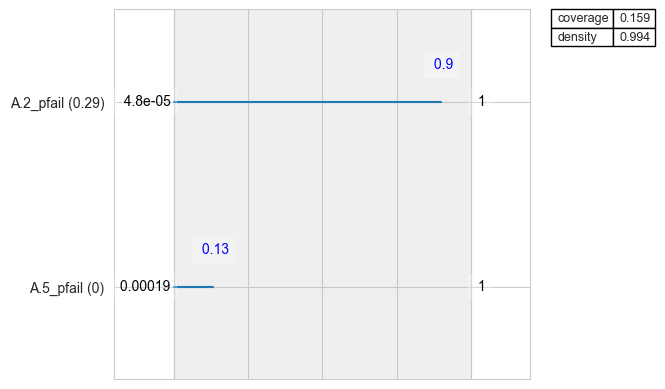

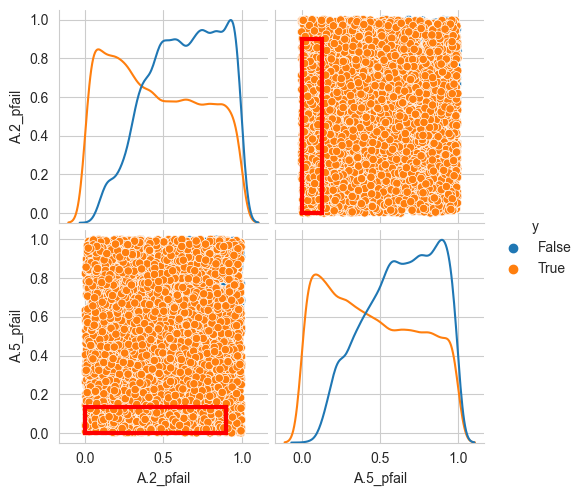

In [14]:
#Yellow
box1.inspect(20)
box1.inspect(20, style="graph")
box1.show_pairs_scatter(20)
plt.show()

coverage     0.417525
density      0.902546
id          10.000000
mass         0.348200
mean         0.902546
res_dim      2.000000
Name: 10, dtype: float64

             box 10                             
                min       max qp value  qp value
A.5_pfail  0.000185  0.382178      NaN  0.000000
A.2_pfail  0.000048  0.900035      NaN  0.032511



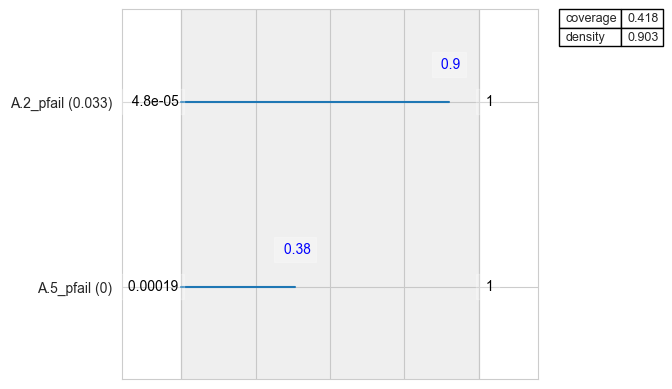

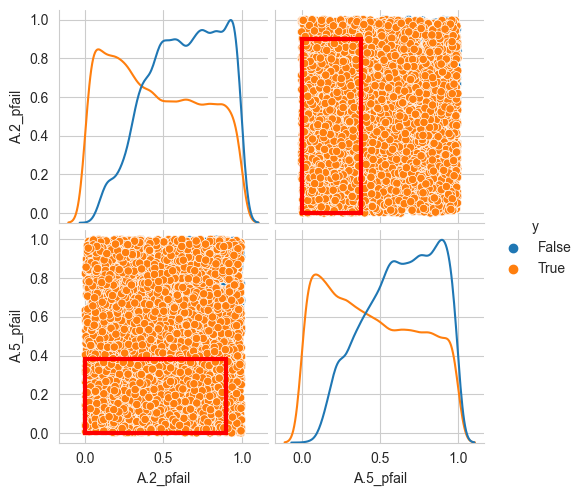

In [15]:
#green
box1.inspect(10)
box1.inspect(10, style="graph")
box1.show_pairs_scatter(10)
plt.show()

coverage    0.918632
density     0.768272
id          1.000000
mass        0.900000
mean        0.768272
res_dim     1.000000
Name: 1, dtype: float64

              box 1                                 
                min       max qp value      qp value
A.2_pfail  0.000048  0.900035      NaN  1.290717e-13



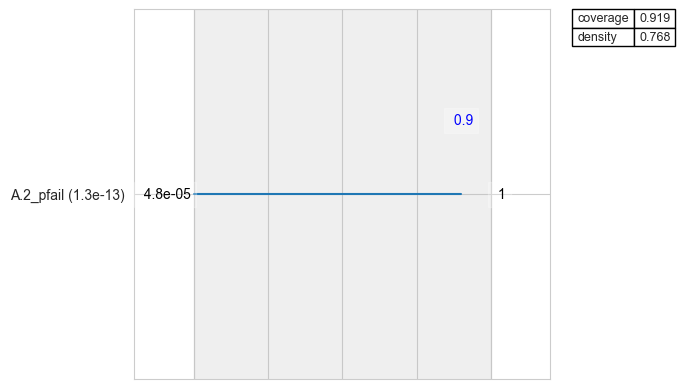

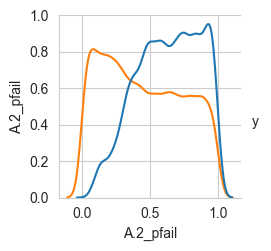

In [16]:
#Blue
box1.inspect(1)
box1.inspect(1, style="graph")
box1.show_pairs_scatter(1)
plt.show()

als a2 faalt heb je kans van 3/4 dat het dodenaantal boven 0.001 ligt
significant als qp value onder 0.05 ligt

### 2....? Expected Annual Damage

[MainProcess/INFO] 45000 points remaining, containing 40500 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.5904, coverage: 0.656, density: 1.0 restricted_dimensions: 4


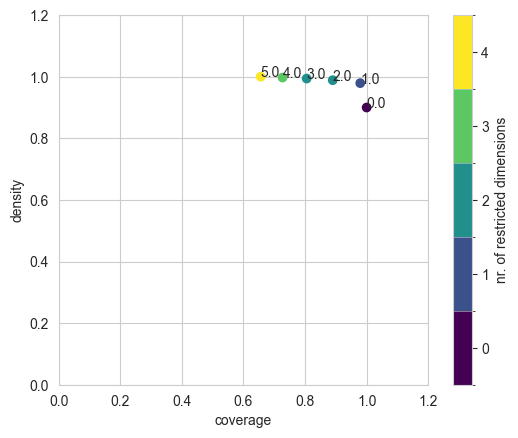

In [17]:
x = uncertainty_experiments
y = outcomes['Expected Annual Damage'] < np.percentile(outcomes['Expected Annual Damage'],90) #

prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

#box1.show_tradeoff(annotated=True) # Deze is puur voor visualiseren en weten welk nummer op de grens zit
box1.show_tradeoff(annotated=True)
plt.show()

coverage    0.6560
density     1.0000
id          5.0000
mass        0.5904
mean        1.0000
res_dim     4.0000
Name: 5, dtype: float64

              box 5                                  
                min       max       qp value qp value
A.1_pfail  0.190564  0.999846   0.000000e+00      NaN
A.3_pfail  0.100833  0.999893  1.089541e-117      NaN
A.5_pfail  0.096657  0.999810   4.879220e-32      NaN
A.2_pfail  0.097471  0.999849   5.566737e-32      NaN



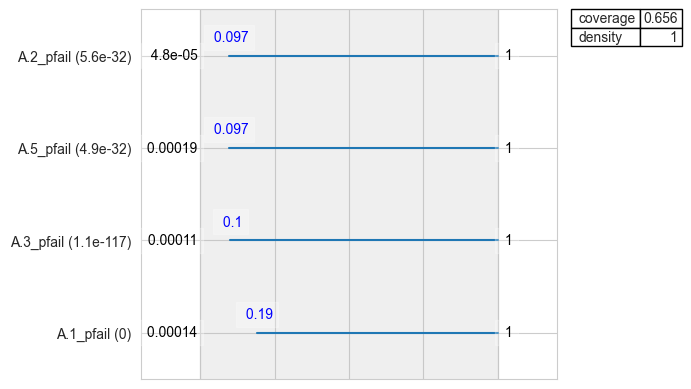

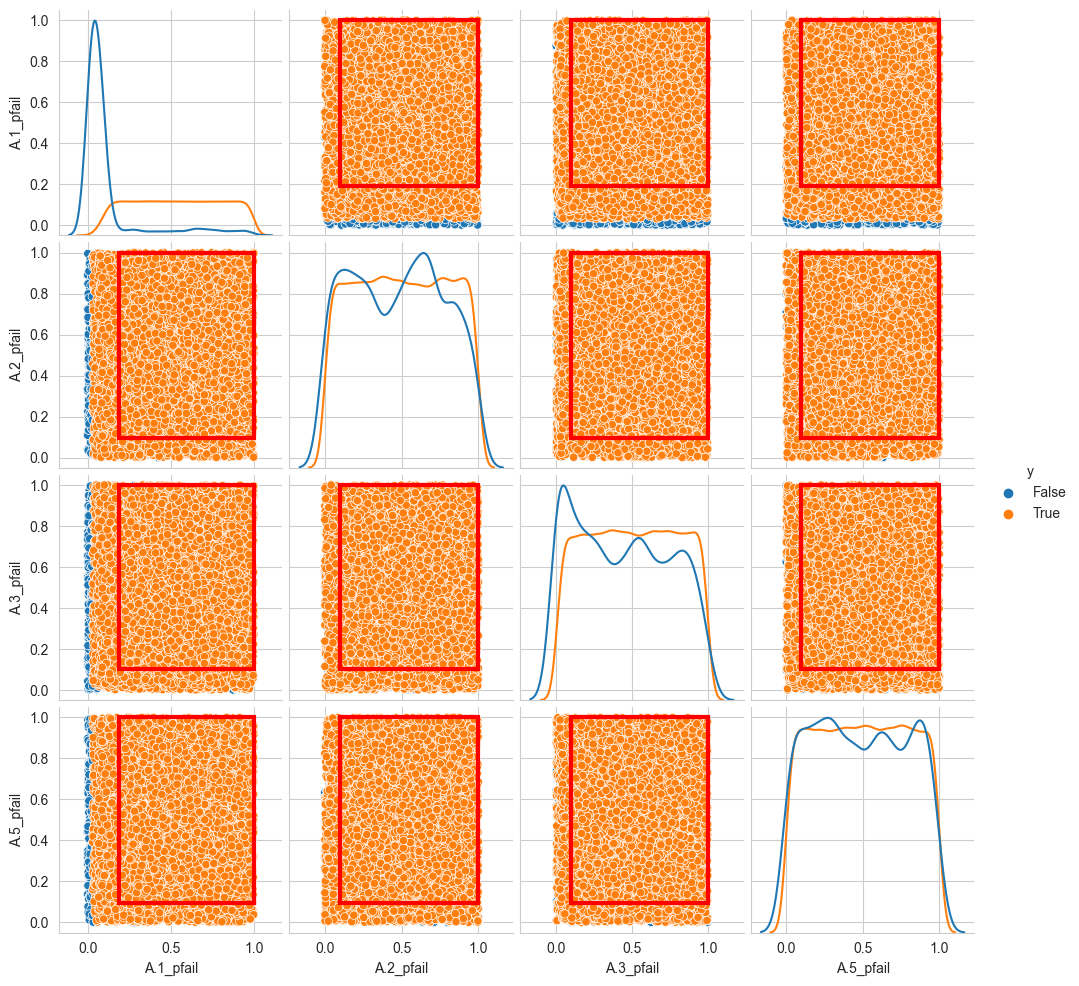

In [19]:
box1.inspect(5)
box1.inspect(5, style="graph")
box1.show_pairs_scatter(5)
plt.show()

coverage    0.805185
density     0.994056
id          3.000000
mass        0.729000
mean        0.994056
res_dim     2.000000
Name: 3, dtype: float64

              box 3                                 
                min       max      qp value qp value
A.1_pfail  0.190564  0.999846  0.000000e+00      NaN
A.3_pfail  0.100833  0.999893  1.396787e-56      NaN



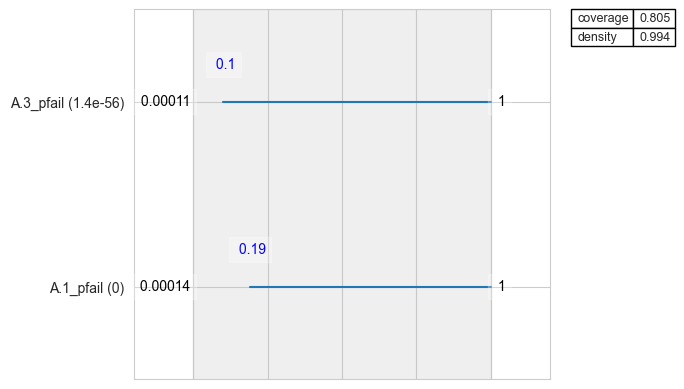

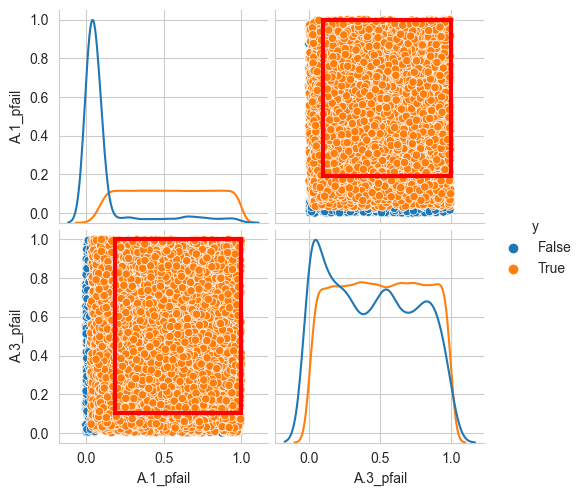

In [20]:
box1.inspect(3)
box1.inspect(3, style="graph")
box1.show_pairs_scatter(3)
plt.show()

coverage    0.97921
density     0.97921
id          1.00000
mass        0.90000
mean        0.97921
res_dim     1.00000
Name: 1, dtype: float64

              box 1                            
                min       max qp value qp value
A.1_pfail  0.100043  0.999846      0.0      NaN



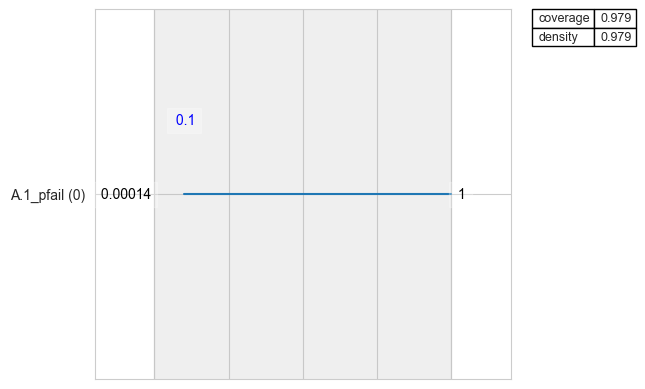

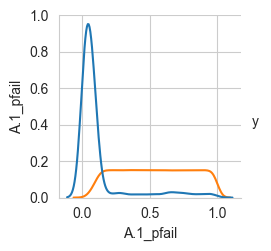

In [21]:
box1.inspect(1)
box1.inspect(1, style="graph")
box1.show_pairs_scatter(1)
plt.show()

# 2.? Trade-off

parcoords.plot() is where each line represents an experiment and the color represents whether it is selected or not. This plot visualizes the trade-offs between different objectives or outcome values.

In [ ]:
import matplotlib.pyplot as plt
from ema_workbench.analysis import parcoords

# Obtain the selected box from PRIM analysis
selected_box = box1

# Perform the trade-off analysis using selected box
data = experiments.loc[selected_box.yi]
data['Selected'] = selected_box.yi

# Visualize the trade-offs using parallel coordinates plot
fig, axes = plt.subplots(figsize=(10, 6))
parcoords.plot(data, ax=axes, color='Selected', colormap='Set1')

# Customize the plot
plt.title('Trade-off Analysis')
plt.xticks(rotation=45)
plt.xlabel('Objectives')
plt.ylabel('Outcome Values')
plt.legend(loc='upper right')

# Show the plot
plt.show()